In [622]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [623]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [624]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [625]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [626]:
for i in df:
    print(df[i].value_counts())

IND    907
Name: country, dtype: int64
India    907
Name: country_long, dtype: int64
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: la

In [627]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [628]:
""""
after analysis dataframe below observations are found:
there are 907 rows & 27 columns in dataset in which both categorical and continous obeservations are there.
datatype are nornal no need to change any datatype.
there are many columns in which all values are null.like: other fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh.
some columns have only one category.Like:gppd_idnr,other_fuel2,country and country_long.
some have mulitple cateogy columns."""""

'"\nafter analysis dataframe below observations are found:\nthere are 907 rows & 27 columns in dataset in which both categorical and continous obeservations are there.\ndatatype are nornal no need to change any datatype.\nthere are many columns in which all values are null.like: other fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh.\nsome columns have only one category.Like:gppd_idnr,other_fuel2,country and country_long.\nsome have mulitple cateogy columns.'

In [629]:
df.drop(['country', 'country_long','name','other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis=1, inplace=True)

In [630]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [631]:
df.drop(['url','gppd_idnr','owner','source','commissioning_year'],axis=1, inplace=True)

In [632]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
df.drop('year_of_capacity_data',axis=1, inplace=True)

In [634]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [635]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [636]:
""""" a lot of outliers are there in capacity column.Generation_gwt columns is having moslty half values null.Despite of null values there is a huge difference between 75% to max data.Data is left skewed."""""

'"" a lot of outliers are there in capacity column.Generation_gwt columns is having moslty half values null.Despite of null values there is a huge difference between 75% to max data.Data is left skewed.'

In [637]:
df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [638]:
from sklearn.preprocessing import LabelEncoder

In [639]:
le=LabelEncoder()

In [640]:
new=df[['primary_fuel','geolocation_source','generation_data_source']]

In [641]:
for i in new:
    df[i]=le.fit_transform(df[i])

In [642]:
df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,1,NaN,NaN,NaN,NaN,NaN,1
1,98.0,24.7663,74.6090,1,2,NaN,NaN,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,7,2,NaN,NaN,NaN,NaN,NaN,1
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,NaN,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,0,NaN,NaN,NaN,NaN,NaN,1
904,25.5,15.2758,75.5811,7,2,NaN,NaN,NaN,NaN,NaN,1
905,80.0,24.3500,73.7477,1,2,NaN,NaN,NaN,NaN,NaN,1


In [643]:
""""" all values a encoded into numbers.Now null values are left for treatment.I am goinng to perform all possible ways to treat null"""""

'"" all values a encoded into numbers.Now null values are left for treatment.I am goinng to perform all possible ways to treat null'

<AxesSubplot:>

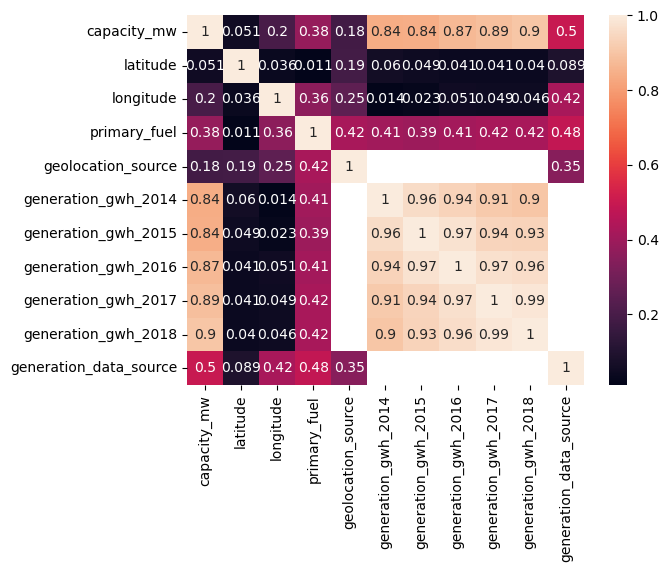

In [644]:
sns.heatmap(df.corr().abs(), annot=True)

In [645]:
""""" 1stly i am imputing latitiude and longitude with most frequent values. and Generation_growth with a common value 1."""""

'"" 1stly i am imputing latitiude and longitude with most frequent values. and Generation_growth with a common value 1.'

In [646]:
from sklearn.impute import SimpleImputer

In [647]:
si=SimpleImputer(strategy='most_frequent')

In [648]:
lat=si.fit_transform(df[['latitude']])

In [649]:
df['latitude']=lat

In [650]:
long=si.fit_transform(df[['longitude']])

In [651]:
df['longitude']=long

In [652]:
df.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

In [653]:
df2=df.copy(deep=True)

In [655]:
df.fillna(1, inplace=True)

In [656]:
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

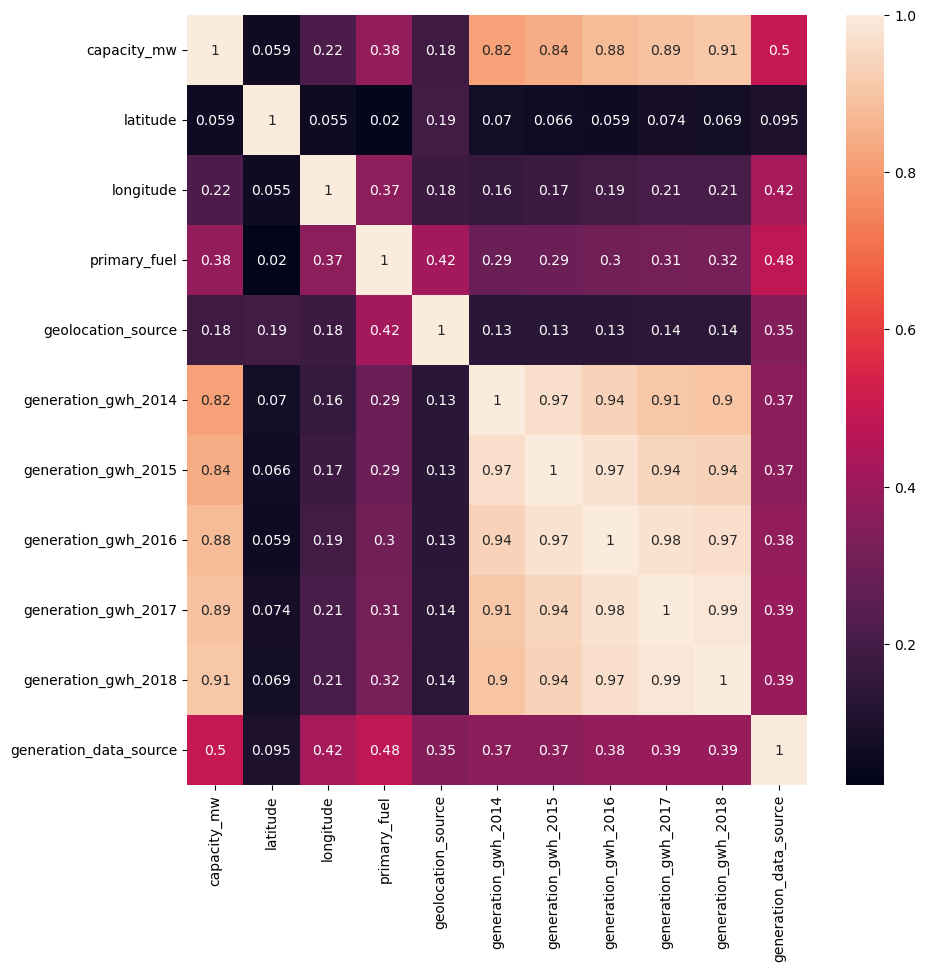

In [657]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().abs(), annot=True)

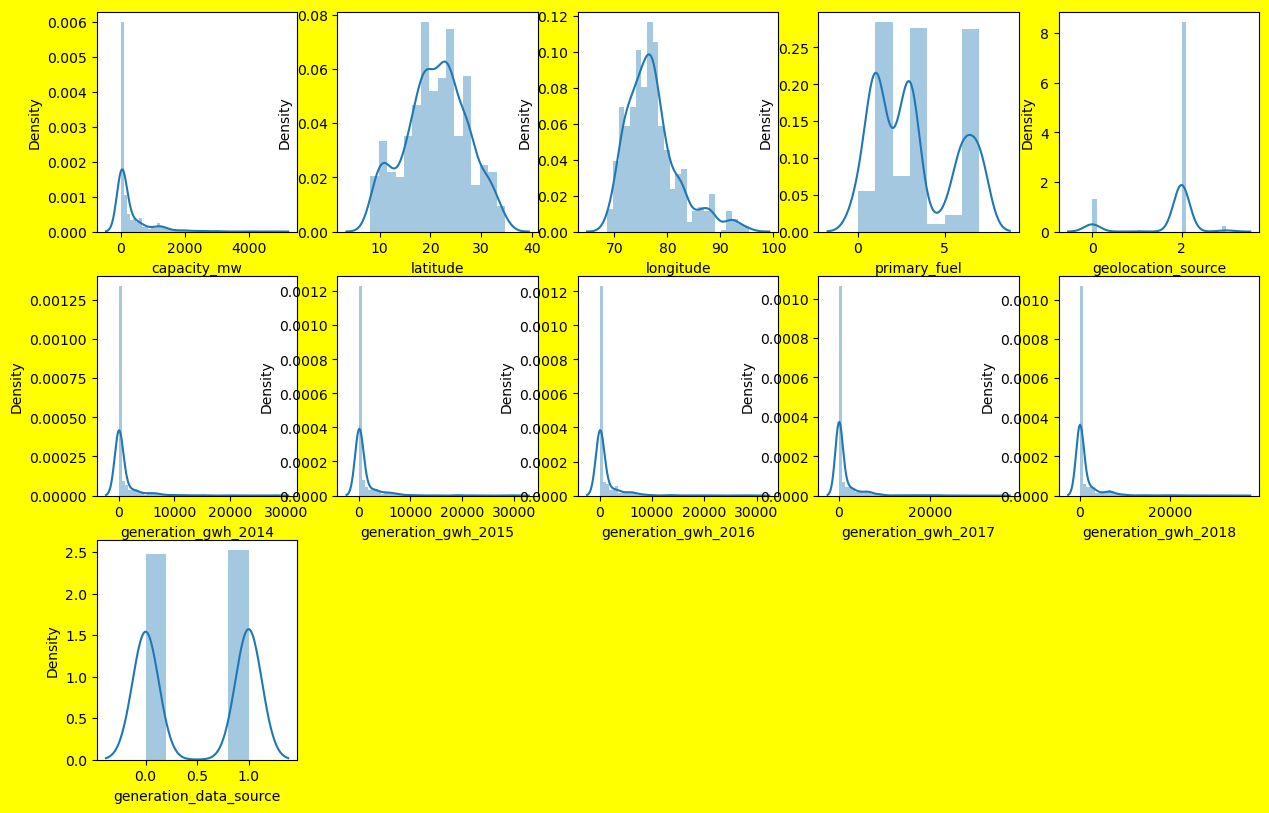

In [658]:
plt.figure(figsize=(15,20), facecolor='yellow', edgecolor='black')

p=1

for column in df:
    if p<=28:
        ax=plt.subplot(6,5,p)
        sns.distplot(df[column])
        
        
        p+=1
plt.show()

In [659]:
from scipy.stats import zscore

In [660]:
np.where(z>3)

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
        179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
        308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
        375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
        494, 494, 494, 494, 499, 519, 532, 577, 623, 638, 648, 648, 648,
        648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
        695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
        726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
        808, 808, 808, 808, 808, 808, 818, 880, 880, 880, 880, 880, 880],
       dtype=int64),
 array([0, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 0, 2, 1, 1, 0, 2, 3, 4, 5, 6, 1,
        0, 2, 3, 4, 5, 6, 1, 1, 1, 1, 0, 0, 2, 3, 4, 5, 6, 0, 1, 1, 0, 6,
        0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 1, 1, 2, 1, 2, 1, 0, 2, 3, 4,
        5, 6, 0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4,
        5, 6, 0, 2, 3, 4,

In [661]:
new=df[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

z=np.abs(zscore(new))
z

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.790446,0.364765,0.363868,0.377234,0.387873,0.389577
1,0.386977,0.515337,0.364765,0.363868,0.377234,0.387873,0.389577
2,0.486679,1.568043,0.364765,0.363868,0.377234,0.387873,0.389577
3,0.324240,2.852648,0.153844,0.092333,0.094410,0.179797,0.199894
4,2.498942,1.052946,0.672950,1.542075,1.617540,1.302600,1.818397
...,...,...,...,...,...,...,...
902,2.159821,0.037134,0.364765,0.363869,0.302902,0.116497,0.181612
903,0.548060,0.199710,0.364765,0.363868,0.377234,0.387873,0.389577
904,0.509909,0.319887,0.364765,0.363868,0.377234,0.387873,0.389577
905,0.417498,0.688509,0.364765,0.363868,0.377234,0.387873,0.389577


In [662]:
data=df[(z<3).all(axis=1)]

In [663]:
data.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,2.5,28.1839,73.2407,6,1,1.000000,1.000000,1.000000,1.000000,1.000000,1
1,1,98.0,24.7663,74.6090,1,2,1.000000,1.000000,1.000000,1.000000,1.000000,1
2,2,39.2,21.9038,69.3732,7,2,1.000000,1.000000,1.000000,1.000000,1.000000,1
3,3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
863,902,1600.0,16.2949,77.3568,1,2,1.000000,0.994875,233.596650,865.400000,686.500000,0
864,903,3.0,12.8932,78.1654,6,0,1.000000,1.000000,1.000000,1.000000,1.000000,1
865,904,25.5,15.2758,75.5811,7,2,1.000000,1.000000,1.000000,1.000000,1.000000,1
866,905,80.0,24.3500,73.7477,1,2,1.000000,1.000000,1.000000,1.000000,1.000000,1


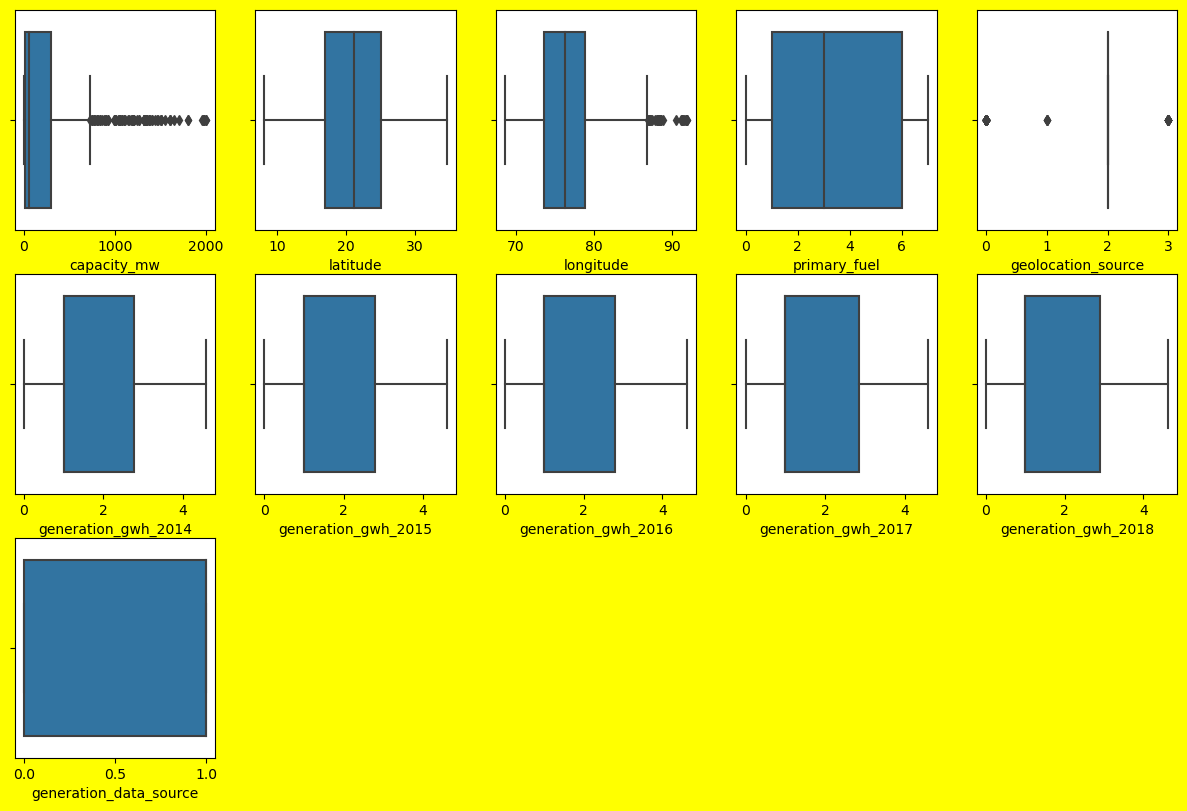

In [672]:
plt.figure(figsize=(15,20), facecolor='yellow', edgecolor='black')

p=1

for column in data:
    if p<=28:
        ax=plt.subplot(6,5,p)
        sns.boxplot(data[column])
        
        
        p+=1
plt.show()

In [665]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

<AxesSubplot:>

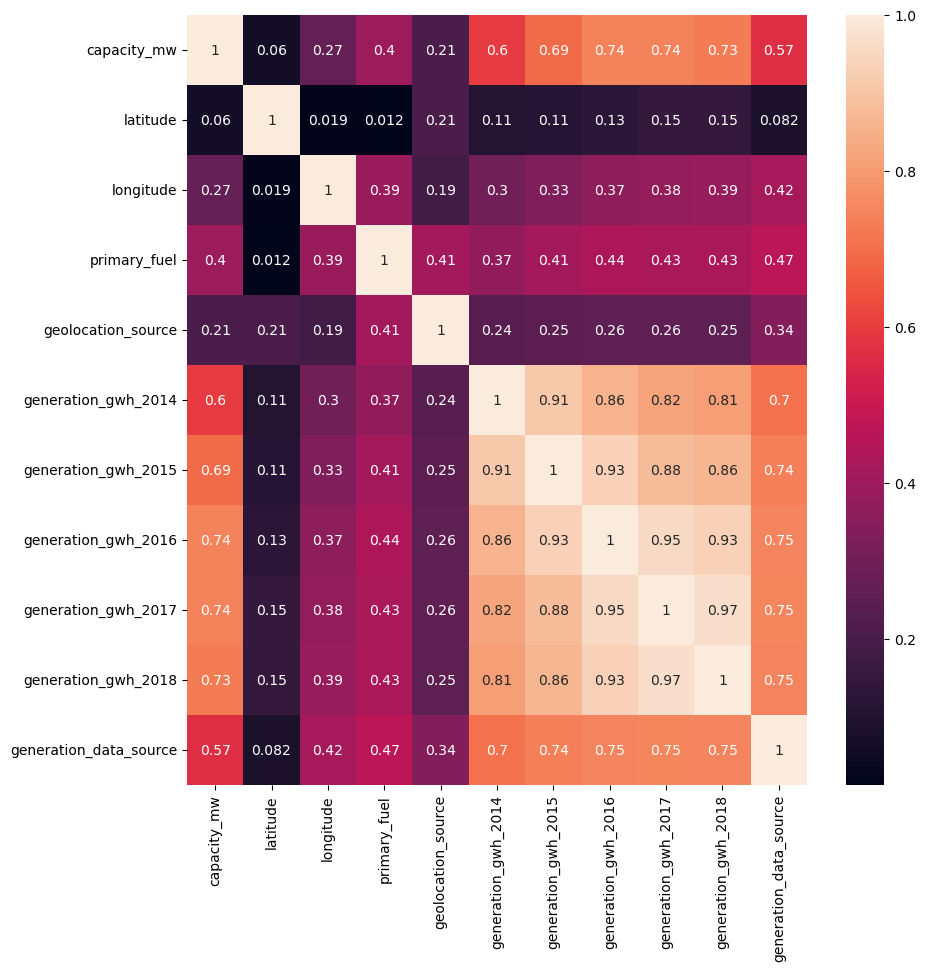

In [673]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs(), annot=True)

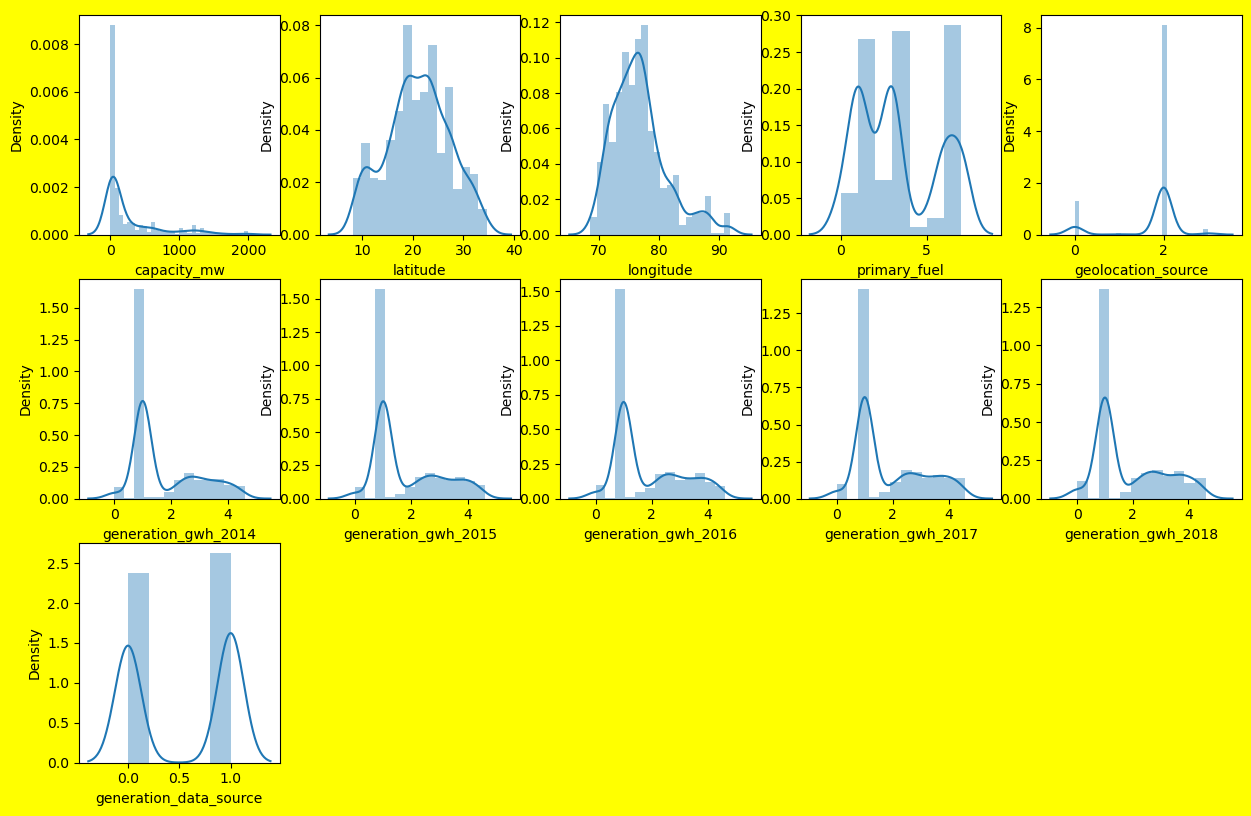

In [674]:
plt.figure(figsize=(15,20), facecolor='yellow', edgecolor='black')

p=1

for column in data:
    if p<=28:
        ax=plt.subplot(6,5,p)
        sns.distplot(data[column])
        
        
        p+=1
plt.show()

In [668]:
data.skew()

capacity_mw               2.032749
latitude                 -0.059468
longitude                 0.976814
primary_fuel              0.418487
geolocation_source       -1.861277
generation_gwh_2014       2.835222
generation_gwh_2015       2.665271
generation_gwh_2016       2.605918
generation_gwh_2017       2.520260
generation_gwh_2018       2.570376
generation_data_source   -0.101689
dtype: float64

In [669]:
data['generation_gwh_2014']=np.cbrt(data['generation_gwh_2014'])
data['generation_gwh_2015']=np.cbrt(data['generation_gwh_2015'])
data['generation_gwh_2016']=np.cbrt(data['generation_gwh_2016'])
data['generation_gwh_2017']=np.cbrt(data['generation_gwh_2017'])
data['generation_gwh_2018']=np.cbrt(data['generation_gwh_2018'])

In [670]:
data.skew()

capacity_mw               2.032749
latitude                 -0.059468
longitude                 0.976814
primary_fuel              0.418487
geolocation_source       -1.861277
generation_gwh_2014       1.304613
generation_gwh_2015       1.254872
generation_gwh_2016       1.210217
generation_gwh_2017       1.180183
generation_gwh_2018       1.161166
generation_data_source   -0.101689
dtype: float64

In [671]:
data['generation_gwh_2014']=np.sqrt(data['generation_gwh_2014'])
data['generation_gwh_2015']=np.sqrt(data['generation_gwh_2015'])
data['generation_gwh_2016']=np.sqrt(data['generation_gwh_2016'])
data['generation_gwh_2017']=np.sqrt(data['generation_gwh_2017'])
data['generation_gwh_2018']=np.sqrt(data['generation_gwh_2018'])

In [675]:
data.skew()

capacity_mw               2.032749
latitude                 -0.059468
longitude                 0.976814
primary_fuel              0.418487
geolocation_source       -1.861277
generation_gwh_2014       0.829485
generation_gwh_2015       0.779317
generation_gwh_2016       0.727606
generation_gwh_2017       0.704229
generation_gwh_2018       0.661155
generation_data_source   -0.101689
dtype: float64

In [676]:
X=data.drop('capacity_mw',axis=1)
y=data['capacity_mw']

In [677]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

In [678]:
std=StandardScaler()

scld=std.fit_transform(X)

In [679]:
VIF=pd.DataFrame()

VIF['vif_score']=[variance_inflation_factor(scld,i)for i in range(scld.shape[1])]
VIF['NAME']=X.columns

In [680]:
VIF

,vif_score,NAME
0,1.101316,latitude
1,1.314220,longitude
2,1.532561,primary_fuel
3,1.338581,geolocation_source
4,6.045226,generation_gwh_2014
5,12.217710,generation_gwh_2015
6,19.329962,generation_gwh_2016
7,23.663953,generation_gwh_2017
8,16.599108,generation_gwh_2018
9,2.776842,generation_data_source


In [ ]:
X.drop('generation_gwh_2017',axis=1, inplace=True)

In [ ]:
scld=std.fit_transform(X)

VIF=pd.DataFrame()

VIF['vif_score']=[variance_inflation_factor(scld,i)for i in range(scld.shape[1])]
VIF['NAME']=X.columns

In [ ]:
VIF

In [ ]:
X.drop('generation_gwh_2016',axis=1, inplace=True)

In [ ]:
scld=std.fit_transform(X)

VIF=pd.DataFrame()

VIF['vif_score']=[variance_inflation_factor(scld,i)for i in range(scld.shape[1])]
VIF['NAME']=X.columns

In [ ]:
VIF

In [ ]:
X.drop('generation_gwh_2015',axis=1, inplace=True)

In [ ]:
scld=std.fit_transform(X)

VIF=pd.DataFrame()

VIF['vif_score']=[variance_inflation_factor(scld,i)for i in range(scld.shape[1])]
VIF['NAME']=X.columns

VIF

In [681]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
ln=LinearRegression()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    ln.fit(x_train,y_train)

    pred=ln.predict(x_train)
    acc=r2_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.4568882353474404
36


In [682]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=36)
ln.fit(x_train,y_train)

ypred=ln.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=ln.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.4568882353474404
Best test accuracy is 0.05525545841250179


In [683]:
mean_absolute_error(y_test,pred)

185.83540777743525

In [684]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    dt.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.9999824000031582
411


In [685]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=411)
dt.fit(x_train,y_train)

ypred=dt.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.9999824000031582
Best test accuracy is 0.5189045844423104


In [686]:
mean_absolute_error(y_test,pred)

142.55491140503122

In [687]:
from sklearn.model_selection import GridSearchCV

In [688]:
param={'criterion':["squared_error","friedman_mse", "absolute_error","poisson"],
      'max_leaf_nodes':[1,2,3,4,5,6],
      'min_samples_split':[1,2,3,4,5,6],
      'min_samples_leaf':[1,2,3,4,5,6],
      }

In [689]:
gd=GridSearchCV(dt,param_grid=param)

In [690]:
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

In [691]:
gd.best_params_

{'criterion': 'squared_error',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [692]:
dtt=DecisionTreeRegressor(criterion= 'squared_error',
 max_leaf_nodes= 5,
 min_samples_leaf= 6,
 min_samples_split= 2,
 random_state= 367)

In [693]:
dtt.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=5, min_samples_leaf=6, random_state=367)

In [694]:
ypred=dtt.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dtt.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.6880704335671128
Best test accuracy is 0.6510162217781912


In [695]:
mean_absolute_error(y_test,pred)

124.41556834964628

In [696]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    ada.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.9999824000031582
411


In [697]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=411)
ada.fit(x_train,y_train)

ypred=ada.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=ada.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.374991385807535
Best test accuracy is 0.12417449172264794


In [698]:
mean_absolute_error(y_test,pred)

258.6773014468715

In [699]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [700]:
best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    knn.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.9999824000031582
411


In [701]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=411)
knn.fit(x_train,y_train)

ypred=knn.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.766084435503082
Best test accuracy is 0.6087429573456171


In [702]:
parm={'algorithm':['kd_tree', 'brute'],
     'leaf_size':[1,2,3,4,5,6,7,8,9],
     'n_neighbors':[1,2,3,4,5,6,7,8,9],
     }

In [703]:
gd=GridSearchCV(knn,param_grid=parm)

In [704]:
gd.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [705]:
gd.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 9, 'n_neighbors': 5}

In [706]:
knn=KNeighborsRegressor(algorithm='kd_tree', leaf_size= 9, n_neighbors= 5)

In [707]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=9)

In [708]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=367)
knn.fit(x_train,y_train)

ypred=knn.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.7549462108106897
Best test accuracy is 0.7044036562962466


In [ ]:
""""" this method is not working good.Now going with droping nulls with.""""" 

In [709]:
df2

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,1,NaN,NaN,NaN,NaN,NaN,1
1,98.0,24.7663,74.6090,1,2,NaN,NaN,NaN,NaN,NaN,1
2,39.2,21.9038,69.3732,7,2,NaN,NaN,NaN,NaN,NaN,1
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,NaN,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,0,NaN,NaN,NaN,NaN,NaN,1
904,25.5,15.2758,75.5811,7,2,NaN,NaN,NaN,NaN,NaN,1
905,80.0,24.3500,73.7477,1,2,NaN,NaN,NaN,NaN,NaN,1


In [710]:
df2.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

In [711]:
df2.dropna(inplace=True)

In [712]:
df2

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,135.0,23.8712,91.3602,2,2,617.789264,843.74700,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,0
5,250.0,23.7689,68.6447,1,2,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,0
6,60.0,10.4547,77.0078,3,2,157.558250,152.19520,61.421350,89.629600,48.327150,0
7,192.0,32.2258,77.2070,3,2,674.391100,721.33520,675.724400,679.594950,579.318850,0
...,...,...,...,...,...,...,...,...,...,...,...
882,400.0,30.5669,79.5468,3,2,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,0
889,1470.0,22.8725,73.3588,1,2,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,0
890,540.0,20.2727,78.9792,1,2,1045.820000,1651.15890,1229.480000,999.170000,940.390000,0
893,62.4,30.3033,77.5684,3,2,184.453100,183.00000,204.253600,175.866250,236.491600,0


In [713]:
df2.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,3,135.0,23.8712,91.3602,2,2,617.789264,843.74700,886.004428,663.774500,626.239128,0
1,4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,0
2,5,250.0,23.7689,68.6447,1,2,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,0
3,6,60.0,10.4547,77.0078,3,2,157.558250,152.19520,61.421350,89.629600,48.327150,0
4,7,192.0,32.2258,77.2070,3,2,674.391100,721.33520,675.724400,679.594950,579.318850,0
...,...,...,...,...,...,...,...,...,...,...,...,...
386,882,400.0,30.5669,79.5468,3,2,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,0
387,889,1470.0,22.8725,73.3588,1,2,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,0
388,890,540.0,20.2727,78.9792,1,2,1045.820000,1651.15890,1229.480000,999.170000,940.390000,0
389,893,62.4,30.3033,77.5684,3,2,184.453100,183.00000,204.253600,175.866250,236.491600,0


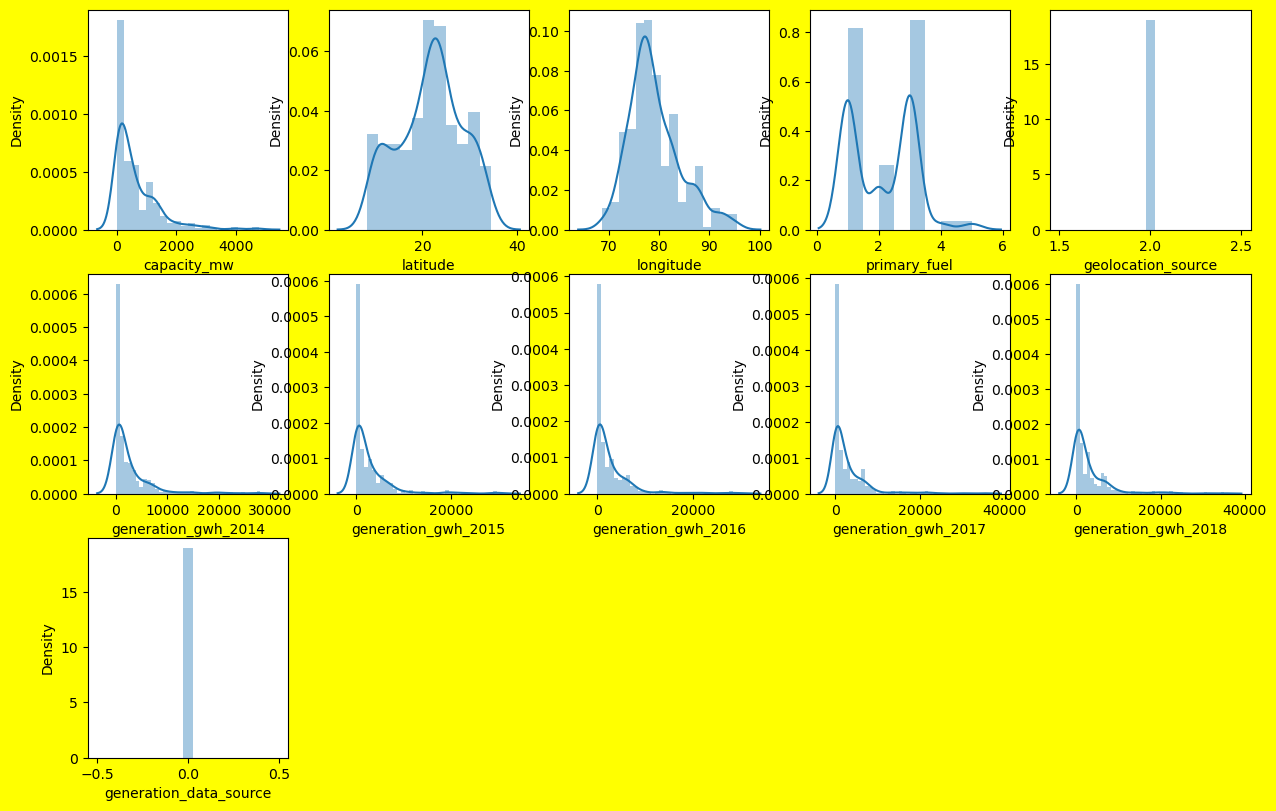

In [714]:
plt.figure(figsize=(15,20), facecolor='yellow', edgecolor='black')

p=1

for column in df2:
    if p<=28:
        ax=plt.subplot(6,5,p)
        sns.distplot(df2[column])
        
        
        p+=1
plt.show()

In [717]:
from scipy.stats import zscore

ghh=df2[['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

z=np.abs(zscore(ghh))
z



,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
3,0.670237,2.371788,0.458965,0.407209,0.402877,0.459089,0.471934
4,1.579040,0.632698,0.138805,0.771122,0.838756,0.624487,1.002644
5,0.514882,2.041558,0.326535,0.322398,0.335717,0.347987,0.394265
6,0.771556,0.416709,0.572754,0.567851,0.593997,0.590846,0.600028
7,0.593235,0.378007,0.444971,0.435644,0.451615,0.455458,0.482334
...,...,...,...,...,...,...,...
882,0.312244,0.076588,0.164978,0.323386,0.137298,0.118003,0.184650
889,1.133237,1.125666,1.058128,0.595781,0.212175,0.999150,1.069871
890,0.123116,0.033690,0.353138,0.219653,0.323267,0.382121,0.402303
893,0.768314,0.307791,0.566104,0.560695,0.560892,0.571056,0.558322


In [718]:
np.where(z>3)

(array([ 10,  58, 138, 157, 157, 157, 157, 157, 177, 212, 212, 212, 212,
        212, 212, 213, 213, 213, 213, 213, 213, 219, 289, 289, 289, 289,
        289, 289, 296, 296, 296, 296, 296, 308, 308, 308, 308, 308, 308,
        321, 321, 321, 321, 321, 321, 336, 336, 336, 336, 336, 336, 350,
        350, 350, 350, 350, 350, 385, 385, 385, 385, 385, 385], dtype=int64),
 array([6, 0, 1, 2, 3, 4, 5, 6, 1, 0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 1,
        0, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5,
        6, 0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6],
       dtype=int64))

In [719]:
jha=df2[(z<3).all(axis=1)]

In [722]:
jha.reset_index()

,index,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,3,135.0,23.8712,91.3602,2,2,617.789264,843.74700,886.004428,663.774500,626.239128,0
1,4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,0
2,5,250.0,23.7689,68.6447,1,2,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,0
3,6,60.0,10.4547,77.0078,3,2,157.558250,152.19520,61.421350,89.629600,48.327150,0
4,7,192.0,32.2258,77.2070,3,2,674.391100,721.33520,675.724400,679.594950,579.318850,0
...,...,...,...,...,...,...,...,...,...,...,...,...
371,882,400.0,30.5669,79.5468,3,2,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,0
372,889,1470.0,22.8725,73.3588,1,2,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,0
373,890,540.0,20.2727,78.9792,1,2,1045.820000,1651.15890,1229.480000,999.170000,940.390000,0
374,893,62.4,30.3033,77.5684,3,2,184.453100,183.00000,204.253600,175.866250,236.491600,0


In [723]:
X=data.drop('capacity_mw',axis=1)
y=data['capacity_mw']

In [724]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [726]:
std=StandardScaler()
Scaled=std.fit_transform(X)

In [727]:
VIF=pd.DataFrame()

VIF['vif_score']=[variance_inflation_factor(Scaled,i)for i in range(Scaled.shape[1])]
VIF['NAME']=X.columns

In [728]:
VIF

,vif_score,NAME
0,1.101316,latitude
1,1.314220,longitude
2,1.532561,primary_fuel
3,1.338581,geolocation_source
4,6.045226,generation_gwh_2014
5,12.217710,generation_gwh_2015
6,19.329962,generation_gwh_2016
7,23.663953,generation_gwh_2017
8,16.599108,generation_gwh_2018
9,2.776842,generation_data_source


In [729]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
ln=LinearRegression()
best_acc=0
best_random_state=0

for i in range(1,800):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    ln.fit(x_train,y_train)

    pred=ln.predict(x_train)
    acc=r2_score(pred,y_train)

    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.4568882353474404
36


In [730]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=321)
ln.fit(x_train,y_train)

ypred=ln.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=ln.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.293532667976216
Best test accuracy is 0.1525219925004


In [731]:
from sklearn.linear_model import LassoCV, Lasso

In [735]:
lasso=LassoCV(alphas=None, cv=17,max_iter=12,random_state=444)

In [736]:
lasso.fit(x_train,y_train)

LassoCV(cv=17, max_iter=12, random_state=444)

In [737]:
alpha=lasso.alpha_
alpha

0.38416158334872325

In [738]:
lasso_reg=Lasso(alpha)
lasso_reg

Lasso(alpha=0.38416158334872325)

In [739]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.38416158334872325)

In [740]:
print(lasso_reg.score(x_train,y_train))
print(lasso_reg.score(x_test,y_test))


0.5859759391898086
0.5734028728792432


In [741]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    dt.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.9999824000031582
411


In [743]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=411)
dt.fit(x_train,y_train)

ypred=dt.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dt.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.9999824000031582
Best test accuracy is 0.568062052805507


In [744]:
mean_absolute_error(y_test,pred)

131.93194366309572

In [745]:
from sklearn.model_selection import GridSearchCV

In [746]:
param={'criterion':["squared_error","friedman_mse", "absolute_error","poisson"],
      'max_leaf_nodes':[1,2,3],
      'min_samples_split':[1,2,3],
      'min_samples_leaf':[1,2,3],
      }

In [747]:
gd=GridSearchCV(dt,param_grid=param)

In [748]:
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]})

In [749]:
gd.best_params_

{'criterion': 'squared_error',
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [751]:
dtt=DecisionTreeRegressor(criterion= 'squared_error',
 max_leaf_nodes= 3,
 min_samples_leaf= 1,
 min_samples_split= 2,
 random_state= 2)

In [752]:
dtt.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=2)

In [753]:
ypred=dtt.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=dtt.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.5834329570448018
Best test accuracy is 0.54643647045866


In [754]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [755]:
best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    knn.fit(x_train,y_train)

    pred=dt.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.9999824000031582
411


In [757]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=411)
knn.fit(x_train,y_train)

ypred=knn.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.766084435503082
Best test accuracy is 0.6087429573456171


In [ ]:
#KNN is only model which is giving some good scores.preicting 2nd priomary fuel

In [758]:
df2

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,135.0,23.8712,91.3602,2,2,617.789264,843.74700,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,0
5,250.0,23.7689,68.6447,1,2,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,0
6,60.0,10.4547,77.0078,3,2,157.558250,152.19520,61.421350,89.629600,48.327150,0
7,192.0,32.2258,77.2070,3,2,674.391100,721.33520,675.724400,679.594950,579.318850,0
...,...,...,...,...,...,...,...,...,...,...,...
882,400.0,30.5669,79.5468,3,2,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,0
889,1470.0,22.8725,73.3588,1,2,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,0
890,540.0,20.2727,78.9792,1,2,1045.820000,1651.15890,1229.480000,999.170000,940.390000,0
893,62.4,30.3033,77.5684,3,2,184.453100,183.00000,204.253600,175.866250,236.491600,0


In [759]:
X=df2.drop('primary_fuel',axis=1)
y=df2['primary_fuel']

In [760]:
std=StandardScaler()

scld=std.fit_transform(X)

In [761]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [764]:
best_acc=0
best_random_state=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=i)
    

    knn.fit(x_train,y_train)

    pred=knn.predict(x_train)
    acc=r2_score(pred,y_train)
    
    if acc > best_acc:
        best_acc=acc
        best_random_state=i

print(best_acc)
print(best_random_state)

0.5968625336355843
826


In [765]:
x_train,x_test,y_train,y_test=train_test_split(scld,y, test_size=0.25, random_state=1)
knn.fit(x_train,y_train)

ypred=knn.predict(x_train)
acc_train=r2_score(ypred,y_train)
print('Best training accuracy is',acc_train)

pred=knn.predict(x_test)
acc_test=r2_score(pred,y_test)
print('Best test accuracy is',acc_test)

Best training accuracy is 0.32421841730645207
Best test accuracy is -0.13931438036486954


In [ ]:
# i found that data is not good for prediction purpose.Techniques are not giving answers which will have good accuracy 

In [767]:
import pickle